## Trả lời các câu hỏi :
- Khi nào mức tiêu thụ điện thường cao nhất và thấp nhất?
- Năng lượng gió và mặt trời được sản xuất đã thay đổi theo mùa như thế nào?
- Xu hướng dài hạn trong tiêu thụ điện, năng lượng mặt trời và năng lượng gió là gì?
- So sánh tỷ lệ sản lượng năng lượng gió và mặt trời với mức tiêu thụ năng lượng gió và mặt trời,
và tỷ lệ này đã thay đổi như thế nào theo thời gian?

## 1. Import libraries and read dataset:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Đối với dạng dữ liệu Time Series, ta có thể chọn cột Date làm index (vì giá trị cột này trong bộ
dữ liệu luôn là duy nhất (unique)):

In [2]:
dataset_path = './dataset/opsd_germany_daily.csv'
opsd_daily = pd.read_csv(dataset_path, index_col='Date', parse_dates=True)

print(opsd_daily.dtypes)
opsd_daily.describe()

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object


,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


### Tạo thêm các số cột Year, Month, Weekday trích từ cột Date

In [3]:
opsd_daily['Year'] = opsd_daily.index.year
opsd_daily['Month'] = opsd_daily.index.month
opsd_daily['Weekday Name'] = opsd_daily.index.day_name()

In [4]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


## 2. Time-based indexing:

In [5]:
# time based indexing
opsd_daily.loc['2014-01-20': '2014-01-22']

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2014-01-20,1590.687,78.647,6.371,85.018,2014,1,Monday
2014-01-21,1624.806,15.643,5.835,21.478,2014,1,Tuesday
2014-01-22,1625.155,60.259,11.992,72.251,2014,1,Wednesday


In [6]:
# partial-string indexing
opsd_daily.loc['2012-02'][:5]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name
Date,,,,,,,
2012-02-01,1511.866,199.607,43.502,243.109,2012,2,Wednesday
2012-02-02,1563.407,73.469,44.675,118.144,2012,2,Thursday
2012-02-03,1563.631,36.352,46.510,82.862,2012,2,Friday
2012-02-04,1372.614,20.551,45.225,65.776,2012,2,Saturday
2012-02-05,1279.432,55.522,54.572,110.094,2012,2,Sunday


## 3. Visualizing time series data:

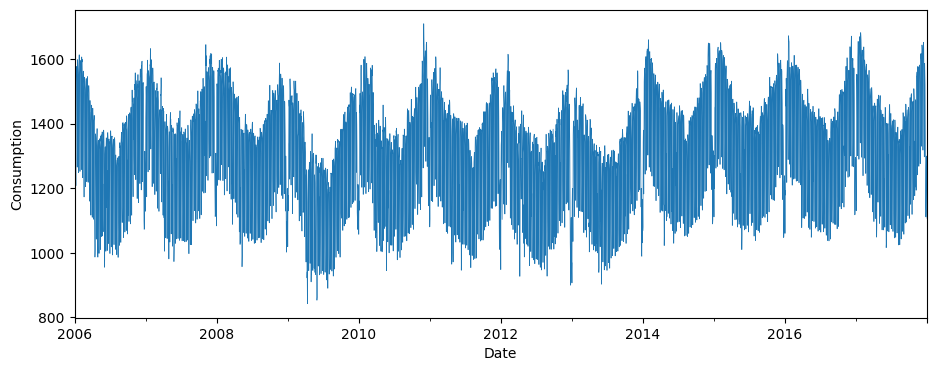

In [7]:
plt.figure(figsize=(11, 4))
col_to_plot = 'Consumption'
opsd_daily['Consumption'].plot(linewidth=0.5)
plt.ylabel(col_to_plot)
plt.show()

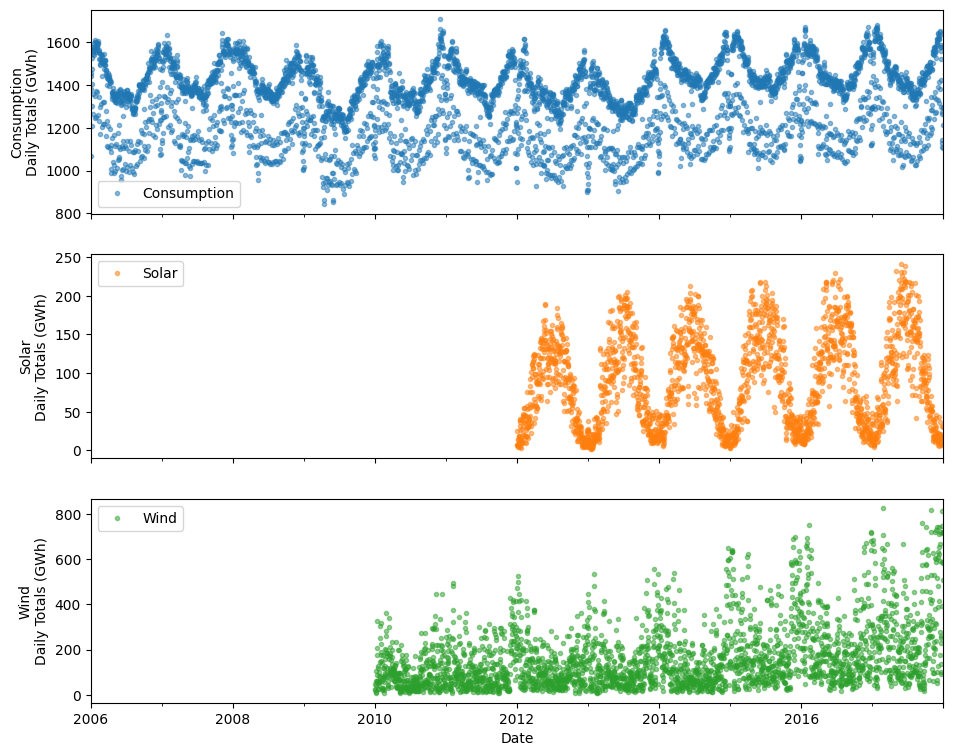

In [8]:

col_to_plots = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[col_to_plots].plot(marker='.', alpha=0.5, linestyle='None', subplots=True, figsize=(11, 9))
for i, ax in enumerate(axes):
    ax.set_ylabel(col_to_plots[i] +'\n'+ 'Daily Totals (GWh)')
plt.show()

## 4. Seasonality visualization

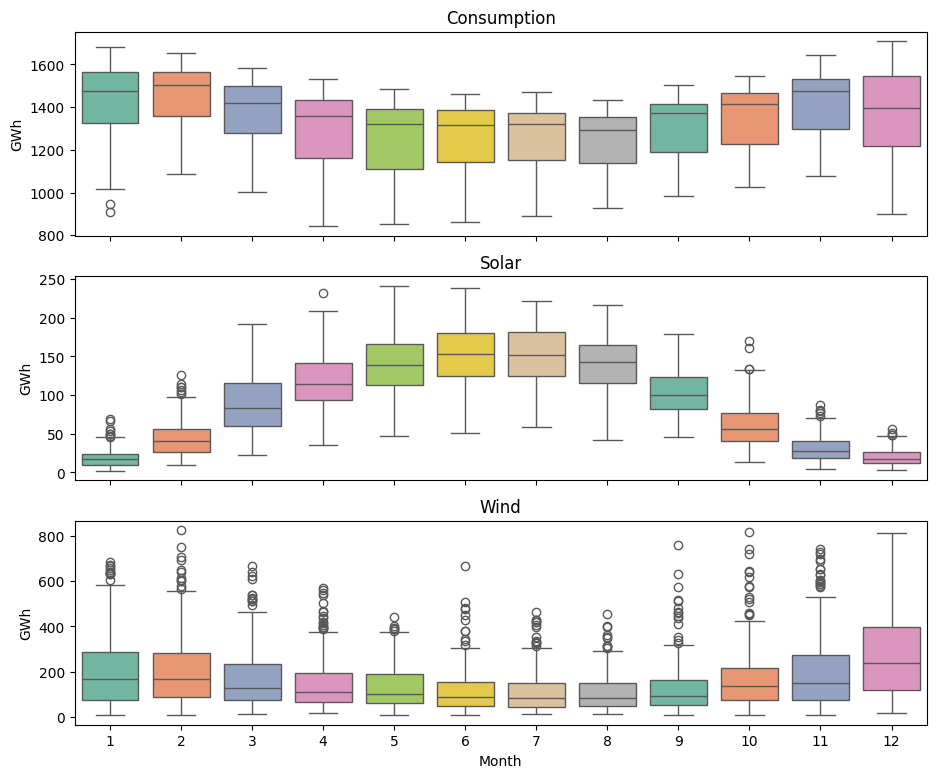

In [9]:
fig , axes = plt.subplots(3, 1, figsize=(11, 9), sharex=True)
col_to_plots = ['Consumption', 'Solar', 'Wind']
for ax, col_name in zip(axes, col_to_plots):
    sns.boxplot(data=opsd_daily, x=opsd_daily['Month'], hue="Month" , y=col_name, ax=ax, palette="Set2")
    ax.set_title(col_name)
    ax.set_ylabel('GWh')
    ax.legend_.remove()


## 5. Frequencies:

In [11]:
times_sample = pd.to_datetime(['2013-02-03', '2013-02-06', '2013-02-08'])


DatetimeIndex(['2013-02-03', '2013-02-06', '2013-02-08'], dtype='datetime64[ns]', freq=None)

Với tính năng này của pandas, ta có thể thực hiện việc thế dữ liệu bị mất bằng kỹ thuật forward
fill (ffill). Kỹ thuật này liên quan đến việc sử dụng giá trị ghi nhận được tại thời điểm trước đó
làm giá trị thay thế cho toàn bộ giá trị bị mất mát sau đó trước khi gặp được mẫu dữ liệu có giá
trị.

In [13]:
# phải copy nếu kh là thao tác sẽ ảnh hưởng đến dữ liệu gốc
consum_sample = opsd_daily.loc[times_sample, ['Consumption']].copy()

# giả định là có các sample trong khoảng này có giá trị Nan
consum_freq = consum_sample.asfreq('D')
consum_freq

,Consumption
2013-02-03,1109.639
2013-02-04,NaN
2013-02-05,NaN
2013-02-06,1451.449
2013-02-07,NaN
2013-02-08,1433.098


In [14]:
consum_freq['Consumption - Forward Fill'] = consum_sample.asfreq('D', method='ffill')
consum_freq

,Consumption,Consumption - Forward Fill
2013-02-03,1109.639,1109.639
2013-02-04,NaN,1109.639
2013-02-05,NaN,1109.639
2013-02-06,1451.449,1451.449
2013-02-07,NaN,1451.449
2013-02-08,1433.098,1433.098


## 6. Resampling:

- khi resampling theo tuần thì dữ liệu ít hơn 1/7 lần

In [16]:
# Resampling theo tuần 
col_to_get = ['Consumption', 'Wind', 'Solar', 'Wind+Solar' ]

opsd_weekly_mean = opsd_daily[col_to_get].resample('W').mean()
opsd_weekly_mean.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184000,NaN,NaN,NaN
2006-01-08,1381.300143,NaN,NaN,NaN
2006-01-15,1486.730286,NaN,NaN,NaN
2006-01-22,1490.031143,NaN,NaN,NaN
2006-01-29,1514.176857,NaN,NaN,NaN


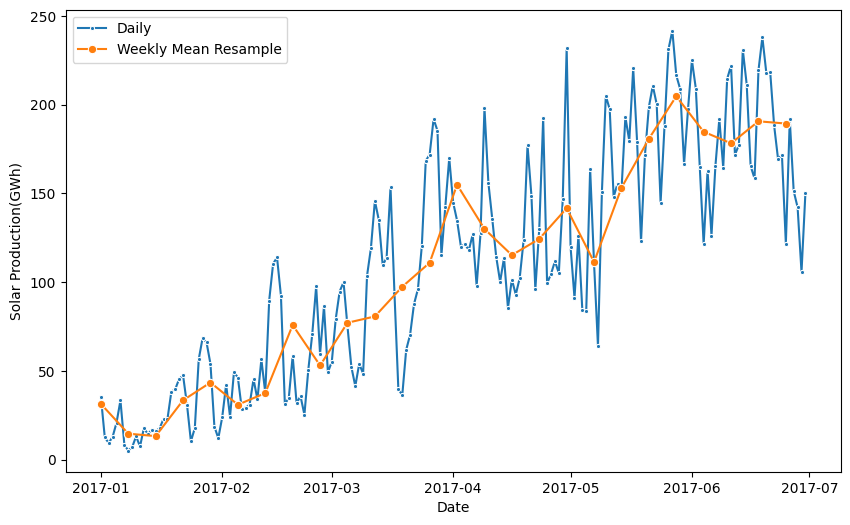

In [22]:
plt.figure(figsize=(10, 6))
start, end = '2017-01', '2017-06'
sns.lineplot(data=opsd_daily[start:end], x='Date',
             y="Solar", marker='.', label='Daily')
sns.lineplot(data=opsd_weekly_mean[start:end], x='Date', y="Solar", marker='o', label = "Weekly Mean Resample")

plt.ylabel("Solar Production(GWh)")
plt.legend()

In [40]:
# khi resample  theo năm sẽ có những dự liệu kh đủ 360days thì sẽ đánh NaN
opsd_annua = opsd_daily[col_to_get].resample('YE').sum(min_count=360)
opsd_annua

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-12-31,489068.53600,NaN,NaN,NaN
2007-12-31,496631.84700,NaN,NaN,NaN
2008-12-31,495570.87600,NaN,NaN,NaN
2009-12-31,459737.42800,NaN,NaN,NaN
2010-12-31,488588.70000,35911.777,NaN,NaN
2011-12-31,484814.08600,44032.951,NaN,NaN
2012-12-31,469574.75400,45862.667,27887.332,73749.999
2013-12-31,463336.85300,47197.832,29559.780,76697.443
2014-12-31,504164.82100,51107.672,32498.307,83370.502


In [41]:
# 1 cách khác để xài sampling là setindex lại = .month, .year

opsd_annua = opsd_annua.set_index(opsd_annua.index.year)
opsd_annua.index.name = 'Year'

#  Tính tỷ lệ gió+mặt trời so với mức tiêu thụ (mức đóng góp của 2 năng lượng trên vào tổng mức tiêu thụ)
opsd_annua['Window+Solar/Consumption'] = opsd_annua['Wind+Solar'] / opsd_annua['Consumption']

opsd_annua

,Consumption,Wind,Solar,Wind+Solar,Window+Solar/Consumption
Year,,,,,
2006,489068.53600,NaN,NaN,NaN,NaN
2007,496631.84700,NaN,NaN,NaN,NaN
2008,495570.87600,NaN,NaN,NaN,NaN
2009,459737.42800,NaN,NaN,NaN,NaN
2010,488588.70000,35911.777,NaN,NaN,NaN
2011,484814.08600,44032.951,NaN,NaN,NaN
2012,469574.75400,45862.667,27887.332,73749.999,0.157057
2013,463336.85300,47197.832,29559.780,76697.443,0.165533
2014,504164.82100,51107.672,32498.307,83370.502,0.165364


Text(0.5, 1.0, 'Wind + Solar Share of Annual Electricity Consumption')

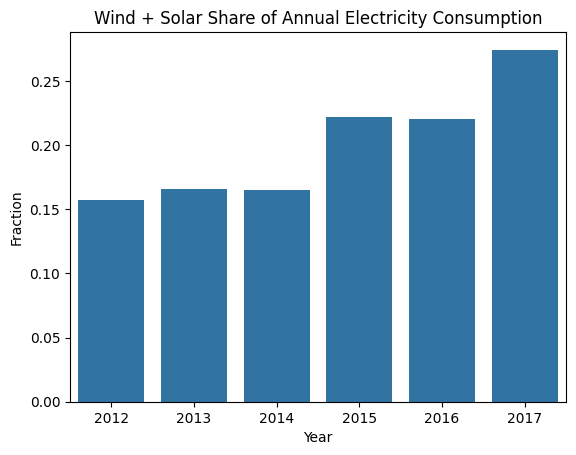

In [45]:
opsd_annua = opsd_annua.dropna(subset=['Window+Solar/Consumption'])

sns.barplot(data=opsd_annua, x='Year', y='Window+Solar/Consumption')

plt.ylabel('Fraction')
plt.title('Wind + Solar Share of Annual Electricity Consumption')

## 7. Rolling windows:

- tạo cửa sổ 7 đơn vị , trượt qua từng đoạn tính mean rồi gán nó vào cuối ngày (nếu gán vào giữa thì thêm center = false)
- ví dụ :
    - từ 1 -> 7 tính mean rồi gán vào 01-07 (center = True thì gán vào 01-04)
    - từ 2 -> 8 tính mean rồi gán vào 02-08 (center = True thì gán vào 01-05) 

In [54]:
opsd_daily[col_to_get].head(7)['Consumption'].mean()

1361.4714285714288

In [57]:
# Compute the centered 7-day rolling mean
opsd_7d = opsd_daily[col_to_get].rolling(7, center=True).mean()
opsd_7d.head(10)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,1361.471429,NaN,NaN,NaN
2006-01-05,1381.300143,NaN,NaN,NaN
2006-01-06,1402.557571,NaN,NaN,NaN
2006-01-07,1421.754429,NaN,NaN,NaN
2006-01-08,1438.891429,NaN,NaN,NaN
2006-01-09,1449.769857,NaN,NaN,NaN


## 8. Trends

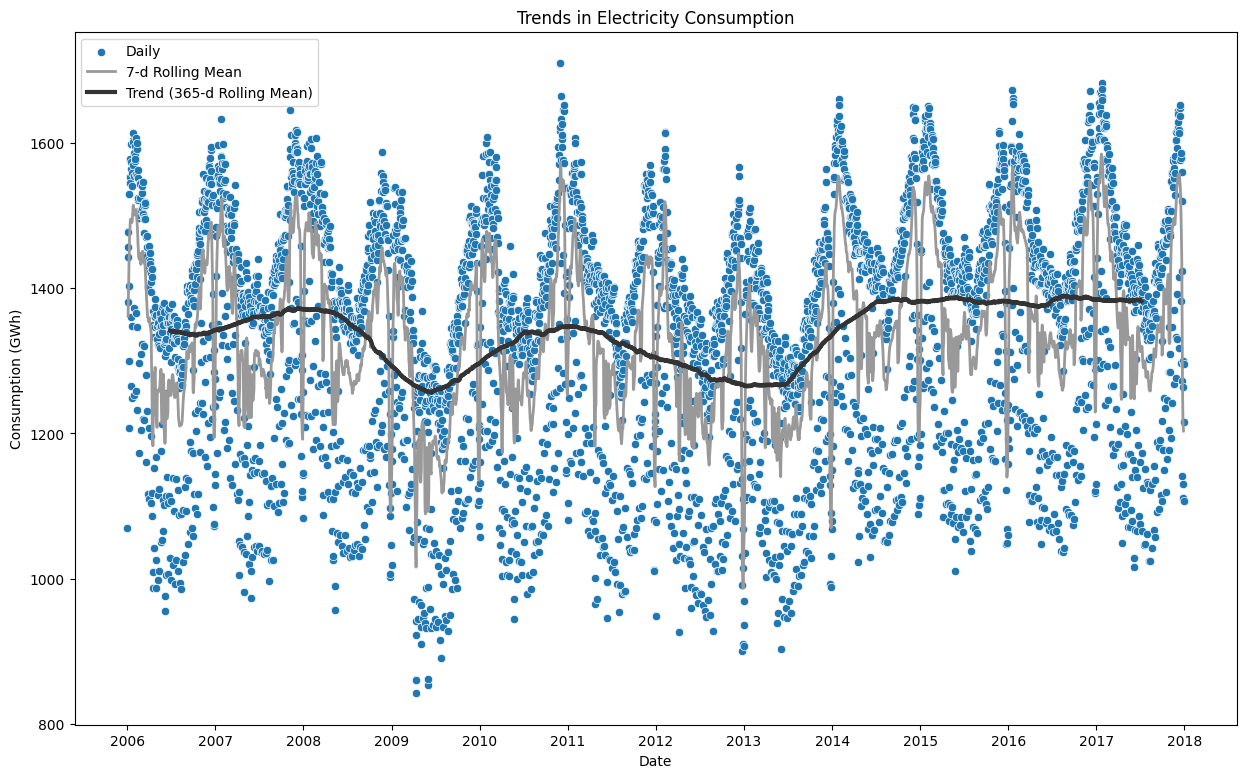

In [84]:
import matplotlib.dates as mdates

opsd_365d = opsd_daily[col_to_get].rolling(window=365, center=True, min_periods=360).mean()

plt.figure(figsize=(15, 9))
sns.scatterplot(data=opsd_daily, x="Date", y="Consumption", label = "Daily")
sns.lineplot(data=opsd_7d, x="Date", y="Consumption", color = "0.6",  label ="7-d Rolling Mean", linewidth = 2)
sns.lineplot(data=opsd_365d, x="Date", y="Consumption", color = "0.2",  label ="Trend (365-d Rolling Mean)", linewidth =3)

# vì thiết lập tự động seaborn sẽ lấy chung chung vài năm , thêm 2 cột này để hiển thị chi tiết hơn cho các năm
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())


plt.ylabel('Consumption (GWh)')
plt.title('Trends in Electricity Consumption')
plt.legend()


(0.0, 400.0)

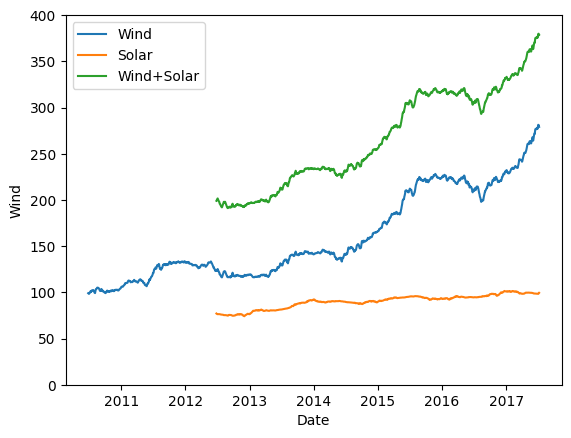

In [108]:

import matplotlib.ticker as ticker
# Plot 365 - day rolling mean time series of wind and solar power
for nm in ['Wind', 'Solar', 'Wind+Solar']:
    sns.lineplot(data=opsd_365d, x="Date", y=nm ,label=nm)

# thêm tick cho trục y
ax = plt.gca()
ax.set_ylim(0,400)